# Problem Statement No. 16

## Consider the Amazon Alexa Reviews Dataset. This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc. Perform following operations on this dataset.
### (I) Remove all punctuations from review text.
### (II) Tokenize the review text into words.
### (III) Remove the Stopwords from the tokenized text.
### (IV) Perform stemming & lemmatization on the review text.
### (V) Perform the word vectorization on review text using Bag of Words technique.
### (VI) Create representation of Review Text by calculating Term Frequency and Inverse Document Frequency (TF-IDF)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Alexa.csv')

In [5]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [7]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.shape

(3149, 5)

<Axes: xlabel='feedback', ylabel='count'>

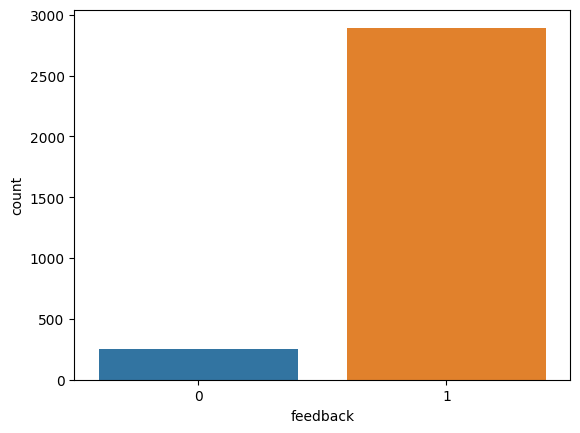

In [10]:
sns.countplot(df, x = 'feedback')

### Convert the review text into lowercase

In [11]:
df['cleaned_text'] = df['verified_reviews'].apply(lambda x: x.lower())

In [12]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,"perfect for kids, adults and everyone in betwe..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,"listening to music, searching locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,"i do love these things, i have them running my..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


### (I) Remove all punctuations from review text.

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

In [15]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


###  Remove emoticons and emojis from the text

In [16]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"
                              u"\U0001F300-\U0001F5FF"
                              u"\U0001F680-\U0001F6FF"
                              u"\U0001F1E0-\U0001F1FF"
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',string)

In [17]:
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: remove_emoji(x))

In [18]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...


In [19]:
df['cleaned_text'][2012]

'i was suppose to get the “free” lightbulb with purchase it did not come with echo upon reading more carefully it says to click a box to receive free bulb  of course i want the free bulb who wouldn’t just a sneaky way for them to get out of having to give so many “ free”  bulbs away disappointed  i have yet to set up my echo our first purchase on any alexia device debating if we want to keep it it did come quickly with my prime membership'

### (II) Tokenize the review text into words.

In [20]:
import nltk
from nltk.tokenize import word_tokenize
df['tokenized'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

In [21]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, my, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,"[loved, it]"
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, while, playing, a, game, you, can,..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[perfect, for, kids, adults, and, everyone, in..."
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[listening, to, music, searching, locations, c..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[i, do, love, these, things, i, have, them, ru..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[only, complaint, i, have, is, that, the, soun..."


### (III) Remove the Stopwords from the tokenized text.

In [22]:
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

In [23]:
df['tokenized'] = df['tokenized'].apply(lambda x: " ".join([i for i in x if i not in sw]))

In [24]:
df['tokenized'] = df['tokenized'].apply(lambda x: x.split())

In [25]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]
...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]"
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[listening, music, searching, locations, check..."
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh..."
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl..."


### (IV) Perform stemming & lemmatization on the review text

In [26]:
from nltk.stem import SnowballStemmer
ss = SnowballStemmer(language='english')

In [27]:
df.head()

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]"
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved]
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music]


In [28]:
df['stemmed_text'] = df['tokenized'].apply(lambda x: " ".join(ss.stem(word) for word in x))

In [29]:
df

,rating,date,variation,verified_reviews,feedback,cleaned_text,tokenized,stemmed_text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo,"[love, echo]",love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it,[loved],love
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes while playing a game you can answer ...,"[sometimes, playing, game, answer, question, c...",sometim play game answer question correct alex...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing my 4 y...,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing 4 yr old learn dinosaur control ...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,[music],music
...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect for kids adults and everyone in between,"[perfect, kids, adults, everyone]",perfect kid adult everyon
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening to music searching locations checkin...,"[listening, music, searching, locations, check...",listen music search locat check time look weat...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i do love these things i have them running my ...,"[love, things, running, entire, home, tv, ligh...",love thing run entir home tv light thermostat ...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i have is that the sound qualit...,"[complaint, sound, quality, isnt, great, mostl...",complaint sound qualiti isnt great most use co...


In [30]:
from nltk.stem import WordNetLemmatizer
WNT = WordNetLemmatizer()

In [31]:
df['lemmatized_text'] = df['tokenized'].apply(lambda x: " ".join(WNT.lemmatize(word) for word in x))

In [34]:
df[['verified_reviews','lemmatized_text']]

,verified_reviews,lemmatized_text
0,Love my Echo!,love echo
1,Loved it!,loved
2,"Sometimes while playing a game, you can answer...",sometimes playing game answer question correct...
3,I have had a lot of fun with this thing. My 4 ...,lot fun thing 4 yr old learns dinosaur control...
4,Music,music
...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",perfect kid adult everyone
3146,"Listening to music, searching locations, check...",listening music searching location checking ti...
3147,"I do love these things, i have them running my...",love thing running entire home tv light thermo...
3148,Only complaint I have is that the sound qualit...,complaint sound quality isnt great mostly use ...


### (V) Perform the word vectorization on review text using Bag of Words technique.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer(stop_words='english')

In [36]:
CV.fit(df['lemmatized_text'])

CountVectorizer(stop_words='english')

In [38]:
len(CV.get_feature_names_out())

3838

In [40]:
x = CV.transform(df['lemmatized_text'])

In [41]:
df_bow = pd.DataFrame(x.toarray(),columns = CV.get_feature_names_out())

In [42]:
df_bow

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,youtubes,yr,yup,zero,zigbee,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### (VI) Create representation of Review Text by calculating Term Frequency and Inverse Document Frequency (TF-IDF)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
TFIDF = TfidfVectorizer()

In [44]:
df_tf = TFIDF.fit_transform(df['lemmatized_text'])

In [45]:
df_tf = df_tf.toarray()

In [46]:
df_tf = pd.DataFrame(df_tf, columns = TFIDF.get_feature_names_out())

In [47]:
df_tf

,072318,10,100,1000,100x,1010,1030pm,11,1100sf,1220,...,youtubes,yr,yup,zero,zigbee,zonkedout,zwave,zzzz,zzzzzzz,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.3275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
